# Object Detection and Bounding Boxes
:label:`sec_bbox`


In the previous section, we introduced many models for image classification. In image classification tasks, we assume that there is only one main target in the image and we only focus on how to identify the target category. However, in many situations, there are multiple targets in the image that we are interested in. We not only want to classify them, but also want to obtain their specific positions in the image. In computer vision, we refer to such tasks as object detection (or object recognition).

Object detection is widely used in many fields. For example, in self-driving technology, we need to plan routes by identifying the locations of vehicles, pedestrians, roads, and obstacles in the captured video image. Robots often perform this type of task to detect targets of interest. Systems in the security field need to detect abnormal targets, such as intruders or bombs.

In the next few sections, we will introduce multiple deep learning models used for object detection. Before that, we should discuss the concept of target location. First, import the packages and modules required for the experiment.


In [1]:
%use @file[../djl.json]

Next, we will load the sample images that will be used in this section. We can see there is a dog on the left side of the image and a cat on the right. They are the two main targets in this image.



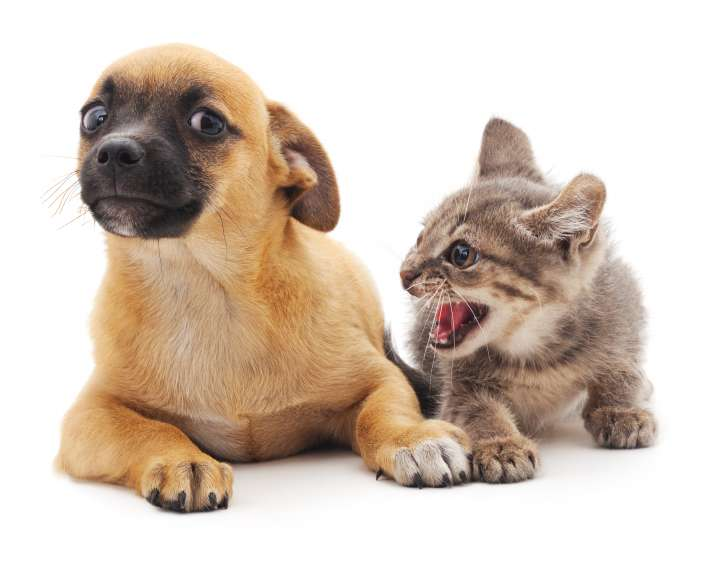

In [2]:
// Load the original image
val imgArr = ImageFactory.getInstance()
    .fromUrl("https://github.com/d2l-ai/d2l-en/blob/master/img/catdog.jpg?raw=true");
imgArr.getWrappedImage()

## Bounding Box

In object detection, we usually use a bounding box to describe the target location. The bounding box is a rectangular box that can be determined by the $x$ and $y$ axis coordinates in the upper-left corner and the $x$ and $y$ axis coordinates in the lower-right corner of the rectangle. We will define the bounding boxes of the dog and the cat in the image based on the coordinate information in the above image. The origin of the coordinates in the above image is the upper left corner of the image, and to the right and down are the positive directions of the $x$ axis and the $y$ axis, respectively.


In [3]:
// bbox is the abbreviation for bounding box
val dog_bbox =doubleArrayOf(60.0, 45.0, 378.0, 516.0)
val cat_bbox = doubleArrayOf(400.0, 112.0, 655.0, 493.0)

We can draw the bounding box in the image to check if it is accurate. Before drawing the box, we will define a helper function `bboxToRectangle`. In DJL, the rectangle we create are basically probabilities. Hence, we divide the coordinates by width and height respectively. It represents the bounding box in the bounding box format of DJL's `Image` API.


In [4]:
fun bboxToRectangle(bbox: DoubleArray, width: Int, height: Int): Rectangle {
    // Convert the coordinates into the 
    // bounding box coordinates format
    return Rectangle(bbox[0]/width, bbox[1]/height, (bbox[2]-bbox[0])/width, (bbox[3]-bbox[1])/height);
}

After loading the bounding box on the image, we can see that the main outline of the target is basically inside the box.



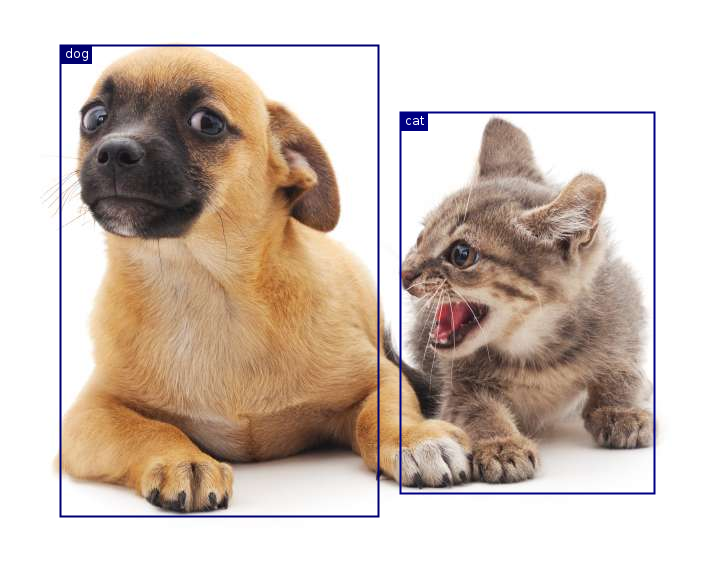

In [6]:
val classNames = listOf("dog", "cat")
val prob = listOf(1.0, 1.0)
val boxes = listOf(
bboxToRectangle(dog_bbox, imgArr.getWidth(), imgArr.getHeight()),
bboxToRectangle(cat_bbox, imgArr.getWidth(), imgArr.getHeight()))
        
val detectedObjects = DetectedObjects(classNames, prob, boxes);

// drawing the bounding boxes on the original image
imgArr.drawBoundingBoxes(detectedObjects);
imgArr.getWrappedImage();

## Summary

* In object detection, we not only need to identify all the objects of interest in the image, but also their positions. The positions are generally represented by a rectangular bounding box.

## Exercises

1. Find some images and try to label a bounding box that contains the target. Compare the difference between the time it takes to label the bounding box and label the category.
